In [1]:
import os
import io
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import missingno

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data, specify index so it's easier to join and search using loc
path = '../../data/new-york-city-airbnb-open-data/'
listings_csv = os.path.join(path,'selected_columns_listings.csv')
df = pd.read_csv(listings_csv)

In [3]:
df.columns


Index(['Unnamed: 0', 'id', 'listing_url', 'name', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_u

In [4]:
df.describe()

,Unnamed: 0,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,50796.000000,5.079600e+04,5.079600e+04,50791.000000,50791.000000,50796.000000,50796.000000,50796.000000,50742.000000,50719.000000,...,39344.000000,39317.000000,39333.000000,39314.000000,39314.000000,50796.000000,50796.000000,50796.000000,50796.000000,40343.000000
mean,25397.500000,2.262308e+07,8.499340e+07,23.644780,23.644780,40.729151,-73.950834,2.862095,1.146240,1.181234,...,9.284211,9.734848,9.740066,9.599812,9.386351,8.097764,6.283802,1.586129,0.128632,1.282087
std,14663.686474,1.317395e+07,9.757076e+07,165.173607,165.173607,0.054842,0.047763,1.890896,0.427081,0.759447,...,1.084723,0.751754,0.771954,0.750225,0.939184,35.145843,34.504970,7.692647,1.263475,1.625176
min,0.000000,2.060000e+03,2.259000e+03,0.000000,0.000000,40.499790,-74.240840,1.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,12698.750000,1.091687e+07,9.531972e+06,1.000000,1.000000,40.689718,-73.983272,2.000000,1.000000,1.000000,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.180000
50%,25397.500000,2.222731e+07,3.862553e+07,1.000000,1.000000,40.723510,-73.955150,2.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.640000
75%,38096.250000,3.490751e+07,1.385156e+08,2.000000,2.000000,40.763040,-73.933870,4.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,1.000000,0.000000,1.900000
max,50795.000000,4.289272e+07,3.414399e+08,2345.000000,2345.000000,40.911690,-73.711560,22.000000,15.500000,21.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,302.000000,302.000000,133.000000,34.000000,66.360000


In [5]:
df.drop(columns=['listing_url','name','host_name','host_url','host_url', 'host_since','host_location','host_listings_count',
          'host_listings_count','street','state','market','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms' ], inplace=True)

In [7]:
host_count  = df['host_id'].value_counts()

In [23]:
fil=df['host_total_listings_count']>1
df[fil].head()

,Unnamed: 0,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
1,1,2595,2845,within a day,87%,38%,f,Midtown,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,Midtown,Midtown,Manhattan,New York,10018,"New York, NY",40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$225.00,$350.00,$95.00,1,$0.00,7,1125,7,7,1125,1125,7.0,1125.0,4 months ago,4,34,64,339,48,5,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,0.38
4,4,5114,7345,within a day,50%,NaN,f,Lower East Side,3.0,"['email', 'phone', 'reviews']",f,Lower East Side,Lower East Side,Manhattan,New York,10002,"New York, NY",40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",$94.00,NaN,NaN,1,$13.00,1,730,1,1,730,730,1.0,730.0,yesterday,30,60,90,109,75,0,2009-03-28,2012-06-09,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,0.56
8,8,5238,7549,within a few hours,100%,26%,t,Lower East Side,4.0,"['email', 'phone', 'manual_online', 'reviews',...",t,Lower East Side,Chinatown,Manhattan,New York,10002,"New York, NY",40.71344,-73.99037,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",$150.00,$0.00,$40.00,2,$10.00,1,1125,1,1,1125,1125,1.0,1125.0,5 days ago,4,8,8,79,161,5,2009-09-01,2019-07-29,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,1.26
11,11,5803,9744,within a few hours,100%,99%,t,Park Slope,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Park Slope,South Slope,Brooklyn,Brooklyn,11215,"Brooklyn, NY",40.66829,-73.98779,t,Townhouse,Private room,2,1.5,1.0,0.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Free street...",$89.00,$200.00,$67.00,1,$22.00,4,14,3,4,14,14,3.9,14.0,3 days ago,26,48,66,341,179,17,2009-04-23,2020-03-07,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,1.35
12,12,6021,11528,within a day,90%,84%,f,Upper West Side,2.0,"['email', 'phone', 'reviews', 'offline_governm...",f,Manhattan,Upper West Side,Manhattan,New York,10025,"New York, NY",40.79826,-73.96113,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Paid par...",$85.00,$200.00,$80.00,1,$40.00,2,730,2,2,730,730,2.0,730.0,7 weeks ago,30,60,90,365,123,23,2009-05-10,2019-12-09,93.0,9.0,10.0,10.0,9.0,9.0,9.0,f,strict_14_with_grace_period,0.93


In [41]:
df['host_id'].value_counts()

107434423    302
219517861    297
137358866    136
30283594     116
16098958     112
            ... 
6470787        1
28940517       1
5479559        1
322697         1
108890111      1
Name: host_id, Length: 38096, dtype: int64

In [34]:
df.groupby('host_total_listings_count').size().sort_values(ascending = False)[fil]

host_total_listings_count
1.0       27105
4.0        1691
8.0         509
1437.0      302
11.0        253
18.0        181
15.0        160
13.0        153
137.0       136
52.0        133
112.0       112
42.0        101
12.0         90
883.0        89
21.0         89
127.0        88
27.0         69
49.0         53
168.0        49
39.0         46
20.0         41
32.0         39
29.0         32
22.0         19
1364.0       16
153.0        14
37.0          4
25.0          2
79.0          1
365.0         1
89.0          1
97.0          1
653.0         1
55.0          1
48.0          1
dtype: int64

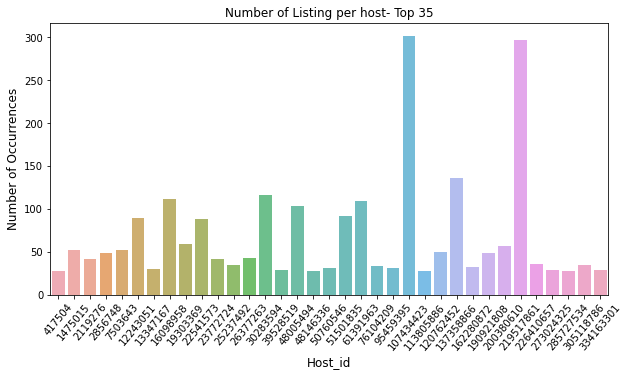

In [8]:
host_count_20=host_count[:35,]
plt.figure(figsize=(10,5))
sns.barplot(host_count_20.index, host_count_20.values, alpha=0.8)
plt.title('Number of Listing per host- Top 35')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Host_id', fontsize=12)
plt.xticks(rotation=50)
plt.show()


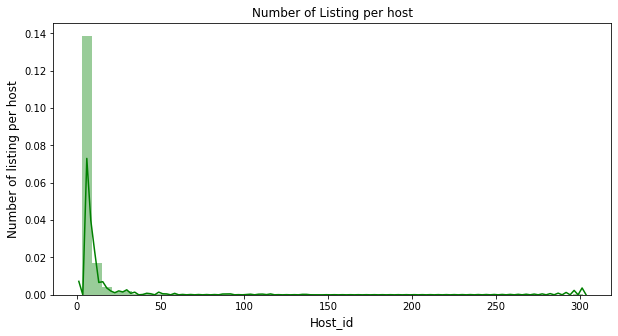

In [9]:
host_count = host_count[:1000]
plt.figure(figsize=(10,5))
sns.distplot(host_count,color='g')
plt.title('Number of Listing per host')
plt.ylabel('Number of listing per host', fontsize=12)
plt.xlabel('Host_id', fontsize=12)
plt.show()

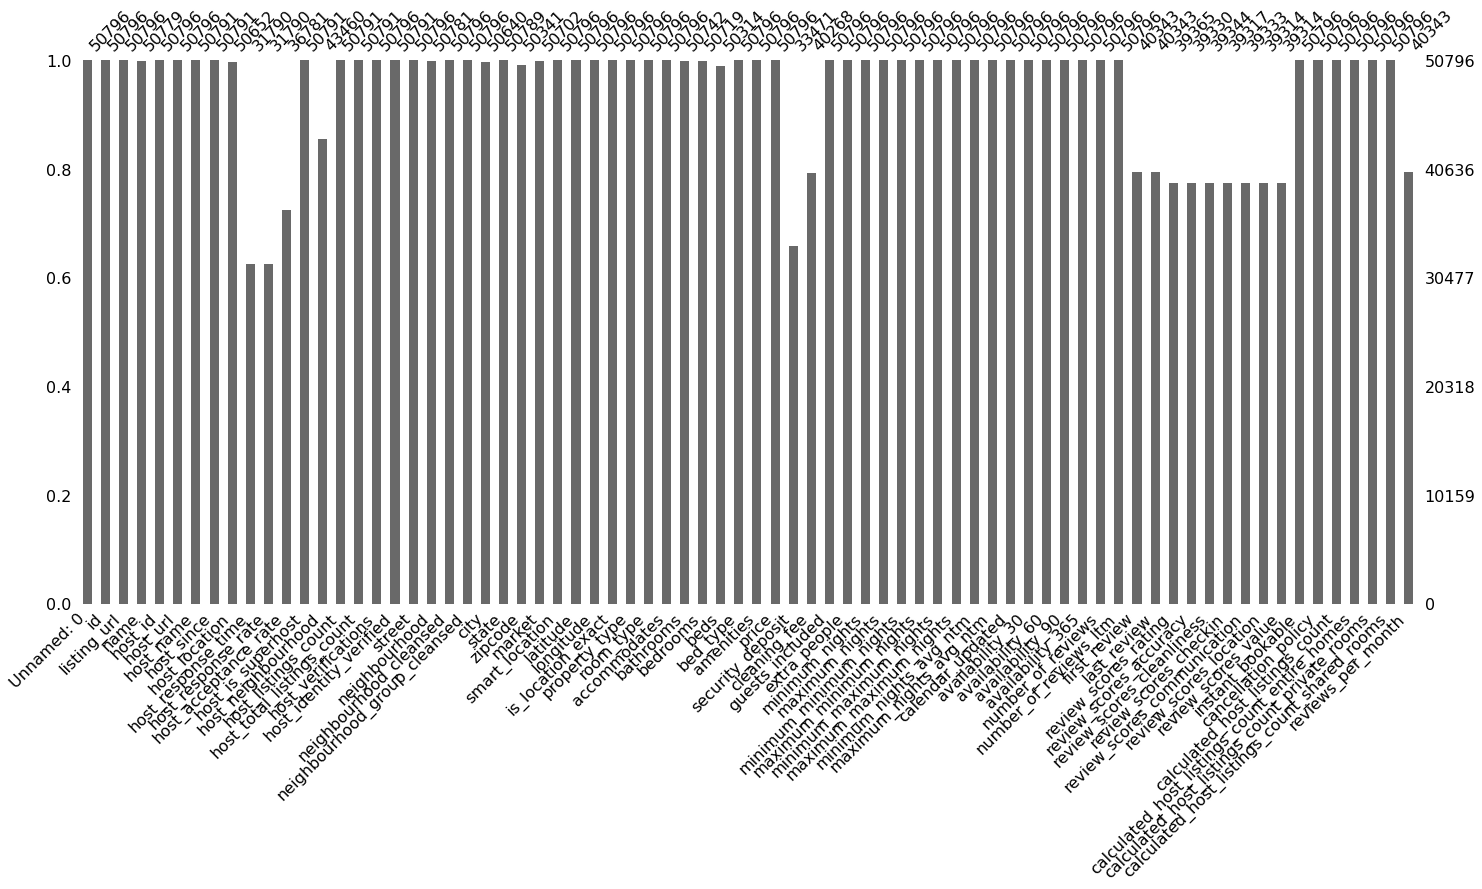

In [20]:
missingno.bar(df, labels=True) 

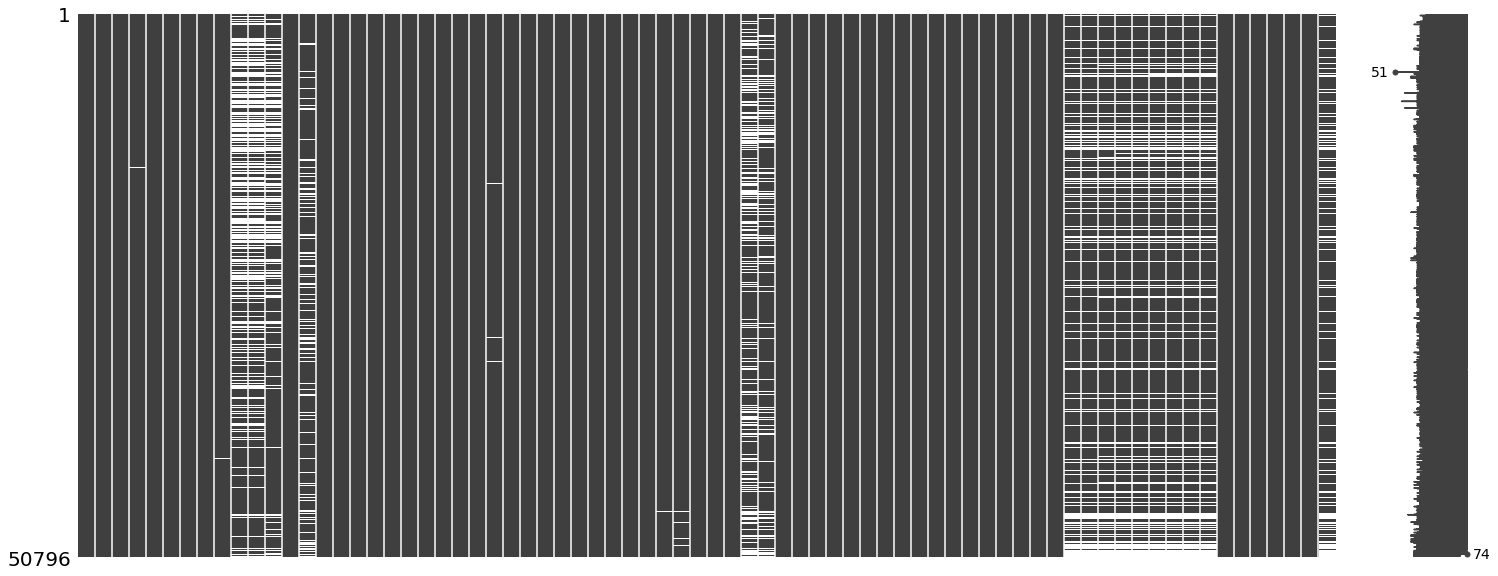

In [19]:
missingno.matrix(df)

In [26]:
df.isna().sum()

Unnamed: 0                          0
id                                  0
host_id                             0
host_response_time              19006
host_response_rate              19006
host_acceptance_rate            14015
host_is_superhost                   5
host_neighbourhood               7336
host_total_listings_count           5
host_verifications                  0
host_identity_verified              5
neighbourhood                      15
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
city                              156
zipcode                           455
smart_location                      0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          54
bedrooms                           77
beds                              482
bed_type    

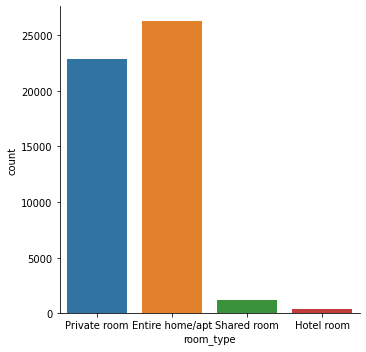

In [23]:
#visualization for type of room
sns.catplot(x='room_type', kind='count' ,data=df)
fig = plt.gcf()
fig.set_size_inches(5, 5)

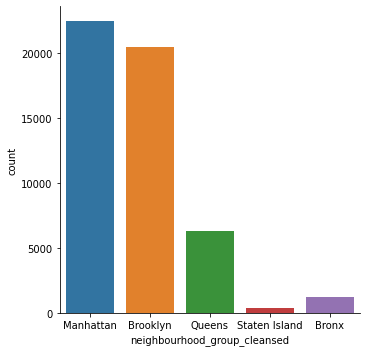

In [25]:
#visualization for neighbourhood
sns.catplot(x='neighbourhood_group_cleansed', kind='count' ,data=df)
fig = plt.gcf()
fig.set_size_inches(5, 5)

In [64]:
df['price'] = pd.to_numeric(df.price.str.replace('$',''),errors='coerce')
df['host_response_rate'] = pd.to_numeric(df.host_response_rate.str.replace('%',''),errors='coerce')
df['host_acceptance_rate'] = pd.to_numeric(df.host_acceptance_rate.str.replace('%',''),errors='coerce')
df['host_is_superhost']=df.host_is_superhost.replace(['t','f'],[1,0])
df['host_identity_verified']=df.host_identity_verified.replace(['t','f'],[1,0])
df['is_location_exact']=df.is_location_exact.replace(['t','f'],[1,0])
df['security_deposit'] = pd.to_numeric(df.security_deposit.str.replace('$',''),errors='coerce')
df['cleaning_fee'] = pd.to_numeric(df.cleaning_fee.str.replace('$',''),errors='coerce') 
df['extra_people'] = pd.to_numeric(df.extra_people.str.replace('$',''),errors='coerce')
df['instant_bookable']=df.instant_bookable.replace(['t','f'],[1,0])

In [65]:
df.host_response_rate.fillna(df.host_response_rate.mean(), inplace=True)
df.host_acceptance_rate.fillna(df.host_acceptance_rate.mean(), inplace=True)
df.host_is_superhost.fillna(df.host_is_superhost.mean(), inplace=True)
df.host_identity_verified.fillna(df.host_identity_verified.mean(), inplace=True)
df.is_location_exact.fillna(df.is_location_exact.mean(), inplace=True)
df.security_deposit.fillna(df.security_deposit.mean(),inplace=True)
df.cleaning_fee.fillna(df.cleaning_fee.mean(),inplace=True)
df.extra_people.fillna(df.extra_people.mean(),inplace=True)

In [66]:
#Drop other type of bed - keep just "Real Bed"
df=df.set_index("bed_type")
df.drop(["Airbed","Couch","Futon","Pull-out Sofa"], axis=0,inplace=True)
#Drop Hotel Room from room_type
df=df[df.room_type != 'Hotel room']

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
pd.crosstab(df.neighbourhood_group_cleansed,df.room_type,margins=True)

room_type,Entire home/apt,Private room,Shared room,All
neighbourhood_group_cleansed,,,,
Bronx,431,754,50,1235
Brooklyn,9767,9990,404,20161
Manhattan,13416,7910,451,21777
Queens,2243,3700,194,6137
Staten Island,185,181,5,371
All,26042,22535,1104,49681


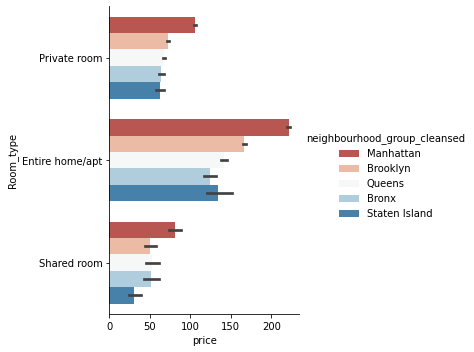

In [9]:
g_1 = sns.catplot(x="price", y="room_type", hue="neighbourhood_group_cleansed", data=df,
              height=5, kind="bar", palette="RdBu")
g_1.despine(left=False)
g_1.set_ylabels("Room_type")

In [9]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [67]:
corr=df.corr()